# Project 1: Customer Database
**This is the first of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-10-13, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **For each question you may use as many cells for your solution as you like**
- **You should document your solution and explain the choices you've made (for example by using multiple cells and use Markdown to assist the reader of the notebook)**
- **You should not remove the problem statements, and you should not modify the structure of the notebook**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**
- **You will be assessed according to correctness and readability of your code, choice of solution, choice of tools and libraries, and documentation of your solution**

## Introduction
Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the companys historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doens't exist, and the only record of sales transactions is kept by John from finance in an Excel spreadsheet. So you've emailed John asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from John, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.

## Part 1: Cleaning the data
John has emailed you the following link to the CSV dump you requested.

- [transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
- Explain what the data is
- Clean it to prepare it for inserting into a database and doing data analysis 

---
### Solution

In [1]:


import pandas as pd
import numpy as np
file = "data/transactions.csv"
df = pd.read_csv(file)
df.head(20)

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55
5,16729-167,Chatterbridge,Spain,Barcelona,359.52€,2016-01-02 07:20:59
6,52125-444,Voomm,France,Paris,266.62€,2016-01-02 07:40:37
7,43419-018,Buzzbean,Germany,Düsseldorf,103.45€,2016-01-02 08:57:57
8,54092-515,Zooxo,United Kingdom,London,£704.94,2016-01-02 09:09:01
9,24286-1562,Lajo,Greece,Thessaloniki,317.65€,2016-01-02 11:01:32


#Explanation of the Data.
The data is a CSV-file containing sales information from 2016-2019. There might be errors within the data that we are not aware of, and so we will begin to clean the data.

In [2]:
df['city'].unique()

array(['Barcelona', 'Thessaloniki', 'Athens', 'Annecy', 'Paris',
       'Düsseldorf', 'London', 'Braga', 'Nanterre', 'Amadora\t',
       'New York', 'Arnhem', 'Nice', 'Lisbon', 'Amsterdam', 'Porto',
       'Boston', 'Niihama', 'Almada', 'Aranhas', 'Heraklion', 'Amiens',
       'Patras', 'Arcueil', 'Lyon', 'Asaka', 'Champagnole', 'Zürich', nan,
       'Monção', 'Vila Fria'], dtype=object)

The data has six columns of attributes (part, company, country, city, price, date). 
In the city column Amadora is consistently written as "Amadora\t". This is corrected to "Amadora".

In [3]:
df = df.replace(to_replace = 'Amadora\t', value = 'Amadora')
df.head(20)

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55
5,16729-167,Chatterbridge,Spain,Barcelona,359.52€,2016-01-02 07:20:59
6,52125-444,Voomm,France,Paris,266.62€,2016-01-02 07:40:37
7,43419-018,Buzzbean,Germany,Düsseldorf,103.45€,2016-01-02 08:57:57
8,54092-515,Zooxo,United Kingdom,London,£704.94,2016-01-02 09:09:01
9,24286-1562,Lajo,Greece,Thessaloniki,317.65€,2016-01-02 11:01:32


In [4]:
df['country'].unique()

array(['Spain', 'Greece', 'France', 'Germany', 'United Kingdom',
       'Portugal', 'United States', 'Netherlands', 'Japan', 'Switzerland',
       nan, 'US', 'Tyskland', 'Portuga'], dtype=object)

It is seen that there are several errors in the countries. These are mainly either danish names for the countries, non-values or abbreviations. The observed errors are: nan, 'US', 'Tyskland', 'Portuga'.

In [5]:
to_replace = {'US': 'United States', 'Tyskland': 'Germany', 'Portuga': 'Portugal'}
df['country'].replace(to_replace, inplace=True)
df['country'].unique()

array(['Spain', 'Greece', 'France', 'Germany', 'United Kingdom',
       'Portugal', 'United States', 'Netherlands', 'Japan', 'Switzerland',
       nan], dtype=object)

Then the presence of missing values are checked

In [6]:
df.isna().sum()

part         10
company       0
country    2171
city         33
price         1
date          0
dtype: int64

It was determined that the missing values for the different parts and prices would not be able to be calculated, since the price of the same parts seems to differ. Therefore these entires were excluded from the data.

In [7]:
df = df[~df.isna()['price']]
df = df[~df.isna()['part']]
df.isna().sum()

part          0
company       0
country    2171
city         33
price         0
date          0
dtype: int64

The next step was to fix the missing country and cities values. The incorrect values were initially determinded.


In [8]:
df['company'].unique()

array(['Chatterbridge', 'Lajo', 'Flipstorm', 'Twitterbeat', 'Voomm',
       'Buzzbean', 'Zooxo', 'Brainsphere', 'Thoughtmix', 'Wordify',
       'Teklist', 'Avaveo', 'Ntags', 'Innojam', 'Shufflebeat', 'Zoonder',
       'Kanoodle', 'Gabcube', 'Roodel', 'Riffpath', 'Eimbee', 'Yozio',
       'Rhycero', 'Realpoint', 'Gabtune', 'Bubblemix', 'Gevee', 'Tagtune',
       'Zooxo.', 'Laj0', 'Ntagz', ' -', ' a', 'aa', 'Thoughtmixz'],
      dtype=object)

In [9]:
print(df[df['company']== 'aa'])
print(df[df['company']== ' a'])
print(df[df['company']== ' -'])

            part company        country      city     price  \
13841  51346-145      aa  United States  New York  $1059.38   

                      date  
13841  2017-12-16 20:02:15  
            part company        country      city   price                 date
13840  37205-992       a  United States  New York  $395.3  2017-12-16 18:59:53
            part company        country    city     price                 date
13839  17156-617       -  United States  Boston  $1168.82  2017-12-16 17:55:55


It was observed that for the companies "aa", " a" and " -" that they all only had one single sale. Therefore it was concluded, that the naming of the company was an error.

In [10]:
print(df[df['city']=='New York']['company'].unique())
print(df[df['city']=='Boston']['company'].unique())

['Wordify' ' a' 'aa']
['Zoonder' ' -']


By investigating the cities from which the wrongly-named companies came from it was observed that there only was one major constumer in each city. It was there for concluded that the sale to "aa" and " a" were to the company "Wordify" and the sale to " -" was to "Zoonder". The incorrect names were therefore replaced with the correct once.

In [11]:
to_replace = {'Zooxo.':'Zooxo', 'Laj0':'Lajo', 'Ntagz':'Lajo', ' -': 'Zoonder', ' a':'Wordify', 'aa':'Wordify', 'Thoughtmixz':'Thoughtmix'}
df['company'].replace(to_replace, inplace=True)
df['company'].unique()

array(['Chatterbridge', 'Lajo', 'Flipstorm', 'Twitterbeat', 'Voomm',
       'Buzzbean', 'Zooxo', 'Brainsphere', 'Thoughtmix', 'Wordify',
       'Teklist', 'Avaveo', 'Ntags', 'Innojam', 'Shufflebeat', 'Zoonder',
       'Kanoodle', 'Gabcube', 'Roodel', 'Riffpath', 'Eimbee', 'Yozio',
       'Rhycero', 'Realpoint', 'Gabtune', 'Bubblemix', 'Gevee', 'Tagtune'],
      dtype=object)

Then the dataset was separated based on the presence of missing data. This was done to lower the processing time. The two datasets were to be joined afterwards.

In [12]:
df_na = df[df.isnull().any(1)]
df_drop = df.dropna()

The next step was to identify which companies had missing values.
A list of unique companies in the df_na dataset were defined and looped through.
For each company, its occurances in df_drop were found and their most common country and city was stored in a dictionary. The cities and their occurances were printed to show why we thought this was a valid approach.

In [13]:
companies = df_na['company'].unique()

comp_dict = {}
for company in companies:
    comp_dict[company] = dict()
    comp_dict[company]['city'] = df_drop[df_drop['company']==company]['city'].value_counts().index[0]
    comp_dict[company]['country'] = df_drop[df_drop['company']==company]['country'].value_counts().index[0]
    print(df_drop[df_drop['company']==company]['city'].value_counts())


Arnhem    387
Name: city, dtype: int64
Braga     1114
Monção       1
Name: city, dtype: int64
Düsseldorf    1125
Name: city, dtype: int64
Porto    1382
Name: city, dtype: int64
Annecy    2037
Name: city, dtype: int64
Heraklion    130
Name: city, dtype: int64
Barcelona    1425
Name: city, dtype: int64
Lisbon    1352
Name: city, dtype: int64
Athens      713
Nanterre    332
Name: city, dtype: int64
Amadora      2511
Vila Fria       1
Name: city, dtype: int64
Aranhas    552
Name: city, dtype: int64
New York    858
Name: city, dtype: int64
Patras    583
Name: city, dtype: int64
Amiens    452
Name: city, dtype: int64
Almada    323
Name: city, dtype: int64
Boston    398
Name: city, dtype: int64
Paris    220
Name: city, dtype: int64
Nice    182
Name: city, dtype: int64
London    1511
Name: city, dtype: int64
Niihama    112
Name: city, dtype: int64
Asaka    47
Name: city, dtype: int64
Arcueil    180
Name: city, dtype: int64
Lyon    24
Name: city, dtype: int64
Thessaloniki    201
Lisbon         

All companies, except for 3, showed to only have one location for which they placed orders. Two of the three only had one occurance of the next most common city, while the third has around two thirds from its primary city. We therefore believe we can assume the missing cities are from the most common in the list above. The country is connected to the city, so the same approach can be used to set those.

Next, these found values were added to lists in the correct order and inserted into the dataset. In order to do this in a simple way, the df_na indices were reset.
In order to keep the same positions as the dataset, the current values were stored if they were not missing.

In [14]:
countries = list()
cities = list()

for comp, country, city in zip(df_na['company'], df_na['country'], df_na['city']):
    if str(city) == 'nan':
        cities.append(comp_dict[comp]['city'])
    else:
        cities.append(city)
    if str(country) == 'nan':
        countries.append(comp_dict[comp]['country'])
    else:
        countries.append(country)

df_na = df_na.reset_index(drop=True)
df_na['country'] = countries
df_na['city'] = cities

In [15]:
df_na
df = pd.concat([df_drop, df_na])
df.isna().sum()

part       0
company    0
country    0
city       0
price      0
date       0
dtype: int64

The dataset now contains no missing information.

---
## Part 2: Enriching the data

A common task for a data scientists is to combine or enrich data from internal sources with data available from external sources. The purpose of this can be either to fix issues with the data or to make it easier to derive insights from the data.

In this part you should enrich your data with data from at least one external source. You may look to part 4 for some  inspiration as to what is required. Your solution should be automated, i.e., you can not ask the reader of your notebook to download any data manually. You should argue why and what you expect to achieve by the enrichments you are doing.

---
### Solution

To make the prices comparable, they are all converted to Euros and the € signs are removed.

Exchange rates are collected automatically from: "https://api.exchangeratesapi.io/latest".

For some values the currency was missing. To solve this it was assumed that the 4 used currencies are USD, GBP, JPY, and EUR (This assumption was made based on the countries previously found). Thus, we checked the origin country and assigned the currency based on that information.

In [16]:
import requests
r = requests.get('https://api.exchangeratesapi.io/latest')
json_resp = r.json()
json_resp

{'rates': {'CAD': 1.4633,
  'HKD': 8.6237,
  'ISK': 136.5,
  'PHP': 57.024,
  'DKK': 7.4679,
  'HUF': 333.64,
  'CZK': 25.781,
  'AUD': 1.6316,
  'RON': 4.7475,
  'SEK': 10.891,
  'IDR': 15579.88,
  'INR': 78.0435,
  'BRL': 4.4709,
  'RUB': 71.3155,
  'HRK': 7.4235,
  'JPY': 117.44,
  'THB': 33.476,
  'CHF': 1.0924,
  'SGD': 1.5175,
  'PLN': 4.3317,
  'BGN': 1.9558,
  'TRY': 6.31,
  'CNY': 7.8582,
  'NOK': 10.0388,
  'NZD': 1.7452,
  'ZAR': 16.6332,
  'USD': 1.0993,
  'MXN': 21.5,
  'ILS': 3.8405,
  'GBP': 0.89155,
  'KRW': 1315.2,
  'MYR': 4.6094},
 'base': 'EUR',
 'date': '2019-10-07'}

The exchange rates for USD, GBP, and JPY were stored

In [17]:
JPY = json_resp['rates']['JPY']
USD = json_resp['rates']['USD']
GBP = json_resp['rates']['GBP']

These exchange rates were used to convert all prices to Euros.

In [18]:
price = df['price']
country = df['country']
new_price = list()

for val, cur in zip(price, country):
    if type(val) == float: #In case currency sign (€,$ etc.) was missing from the price-value.
        if cur == 'Japan':
            val = val / JPY
        elif cur == 'United States':
            val = val / USD
        elif cur == 'United Kingdom':
            val = val / GBP
    elif val[0] == '$':
        val = float(val[1:]) / USD
    elif val[0] == '£':
        val = float(val[1:]) / GBP
    elif val[0] == '¥':
        val = float(val[1:]) / JPY
    elif val[-1] == '€':
        val = float(val[:-1])
    
    new_price.append(val)
df['price'] = new_price
df.head(10)

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55,2016-01-02 04:51:55
5,16729-167,Chatterbridge,Spain,Barcelona,359.52,2016-01-02 07:20:59
6,52125-444,Voomm,France,Paris,266.62,2016-01-02 07:40:37
7,43419-018,Buzzbean,Germany,Düsseldorf,103.45,2016-01-02 08:57:57
8,54092-515,Zooxo,United Kingdom,London,790.69,2016-01-02 09:09:01
9,24286-1562,Lajo,Greece,Thessaloniki,317.65,2016-01-02 11:01:32


The currencies were then all converted to Euros.

Some of the dates had another format that others (dd/mm/yyyy and xxxx-mm-dd), and so they all were converted to the same format. In the cases of missing time values the time was set to 12:00:00. 

In [19]:
years = list()
dates = list()
times = list()

for date in df['date']:
    if date[4]=='-':
        years.append(date[:4])
        dates.append(date[5:10])
        times.append(date[11:])
    else:
        years.append(date[-4:])
        new_date = "{}-{}".format(date[3:5],date[:2])
        dates.append(new_date)
        times.append('12:00:00')
df['date'] = ["{}-{} {}".format(years[x], dates[x], times[x]) for x in range(len(years))]
df

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55,2016-01-02 04:51:55
5,16729-167,Chatterbridge,Spain,Barcelona,359.52,2016-01-02 07:20:59
6,52125-444,Voomm,France,Paris,266.62,2016-01-02 07:40:37
7,43419-018,Buzzbean,Germany,Düsseldorf,103.45,2016-01-02 08:57:57
8,54092-515,Zooxo,United Kingdom,London,790.69,2016-01-02 09:09:01
9,24286-1562,Lajo,Greece,Thessaloniki,317.65,2016-01-02 11:01:32


---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

---
### Solution

Database was created and connection established. In case the code should be re-run, a drop table command was implemented.

In [20]:
import sqlite3
conn = sqlite3.connect('data/transactions.db')
c = conn.cursor()

In [21]:
c.execute('DROP TABLE IF EXISTS sales')

In order to maintain the correct dtypes, a SQL table was created and the dataframe was appended to it.

In [22]:
c.execute("""CREATE TABLE IF NOT EXISTS sales(id INTEGER PRIMARY KEY, part TEXT,
             company TEXT, country TEXT, city TEXT, price REAL, date TEXT)""")
conn.commit()

In [23]:
df.to_sql('sales', con = conn, if_exists = 'append', index = False)
c.execute('SELECT * FROM sales')
c.fetchall()

[(1,
  '54868-5165',
  'Chatterbridge',
  'Spain',
  'Barcelona',
  784.79,
  '2016-01-02 00:01:05'),
 (2,
  '60505-2867',
  'Lajo',
  'Greece',
  'Thessaloniki',
  187.99,
  '2016-01-02 00:05:26'),
 (3,
  '24385-268',
  'Flipstorm',
  'Greece',
  'Athens',
  221.73,
  '2016-01-02 00:18:30'),
 (4,
  '76117-001',
  'Twitterbeat',
  'France',
  'Annecy',
  1075.82,
  '2016-01-02 02:32:30'),
 (5,
  '44946-1046',
  'Chatterbridge',
  'Spain',
  'Barcelona',
  412.55,
  '2016-01-02 04:51:55'),
 (6,
  '16729-167',
  'Chatterbridge',
  'Spain',
  'Barcelona',
  359.52,
  '2016-01-02 07:20:59'),
 (7, '52125-444', 'Voomm', 'France', 'Paris', 266.62, '2016-01-02 07:40:37'),
 (8,
  '43419-018',
  'Buzzbean',
  'Germany',
  'Düsseldorf',
  103.45,
  '2016-01-02 08:57:57'),
 (9,
  '54092-515',
  'Zooxo',
  'United Kingdom',
  'London',
  790.6903707027088,
  '2016-01-02 09:09:01'),
 (10,
  '24286-1562',
  'Lajo',
  'Greece',
  'Thessaloniki',
  317.65,
  '2016-01-02 11:01:32'),
 (11,
  '49035-530',

---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

---
### Solution

The following plot was made to show our boss who the costumers with the highest revenues are. We see that Thoughtmix is the number one costumer.

In [24]:
import matplotlib.pyplot as plt
c.execute('SELECT company, SUM(price) FROM sales GROUP BY company ORDER BY SUM(price) DESC')

pd.DataFrame(c.fetchall(), columns = ['company','price']).plot.bar(x='company',y='price')

We see that Thoughtmix is the number one costumer.

The following plot was made to show our boss which costumers that have had declining business.

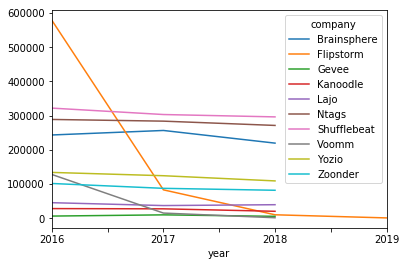

In [25]:
command = '''
    SELECT company, SUM(price), SUBSTR(date,1,4) FROM sales
    GROUP BY company, SUBSTR(date,1,4)
'''
c.execute(command)
data = pd.DataFrame(c.fetchall(), columns = ['company','price','year'])
data_piv = data.pivot(index='year', columns='company', values='price')

for company in data['company'].unique():
    if data_piv[company][0] < data_piv[company].dropna()[-1]:
        data_piv.drop(columns=company, inplace=True)
data_piv.plot()

We see the especially Flipstorm and Voomm have made fewer purchases in 2017 and 2018 than in 2016.

The following table and plot was made show our boss which parts that are sold in greatest quantity. We thought this could be an important thing to show, since it could provide great info for supply chain management.

,part,count
0,17156-617,300
1,37205-992,295
2,0268-6107,293
3,52959-433,293
4,54868-0823,292
5,62011-0219,291
6,51346-145,289
7,13537-259,287
8,58118-5060,286
9,10237-832,285


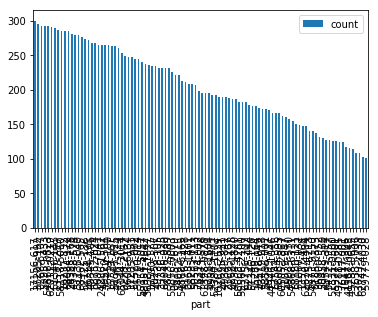

In [26]:
command = '''
    SELECT part, COUNT(*) FROM sales
    GROUP BY part
    ORDER BY COUNT(part) DESC
'''
c.execute(command)
data = pd.DataFrame(c.fetchall(), columns = ['part','count'])
data.plot.bar(x='part',y='count')
data.head(10)

We see that the best selling part "only" outsells the lowest selling part by a factor 3x. The table could be expanded (by modifying the header input) if the ID of all the parts is to be showen (since it can't be read from the graph).

The following table and plot was made to determine the sales distribution based on the countries. We thought this could provide interesting knowledge into which emerging markets that the company could expand into. With this knowledge, we thought it could be interesting to see which markets that has had the largest percentage-wise growth over the last 3 years.

,country,price in €
0,Portugal,4.763407e+06
1,France,2.235683e+06
2,Greece,1.062999e+06
3,United Kingdom,9.597132e+05
4,Spain,9.193497e+05
5,United States,8.240667e+05
6,Germany,7.139126e+05
7,Netherlands,2.672517e+05
8,Japan,1.058049e+05
9,Switzerland,6.579640e+03


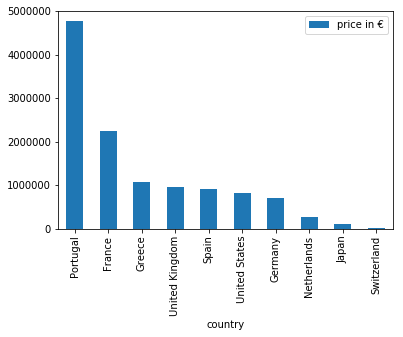

In [27]:
command = '''
    SELECT country, SUM(price) FROM sales
    GROUP BY country
    ORDER BY SUM(price) DESC
'''
c.execute(command)
data = pd.DataFrame(c.fetchall(), columns = ['country','price in €'])
data.plot.bar(x='country',y='price in €')
data

As it can be seen, Portugal is by far the largest market. Smaller markets, such as Switzerland and Japan are also very interesting, since they could potentially be markets that the company could tap into.

country,Germany,Netherlands,Spain,Switzerland
year,,,,
2016,0.000000,0.000000,0.000000,0.000000
2017,1.720827,-5.351542,-4.339380,253.001456
2018,11.429726,12.471480,5.240812,98.736902


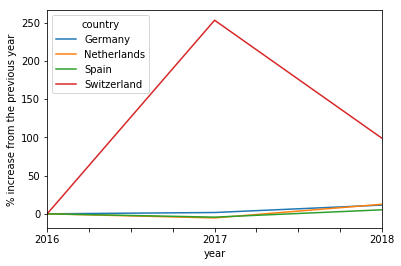

In [36]:
command = '''
    SELECT country, SUM(price), SUBSTR(date,1,4) FROM sales
    GROUP BY country, SUBSTR(date,1,4)
'''
c.execute(command)
#c.fetchall()
data = pd.DataFrame(c.fetchall(), columns = ['country','price','year'])
data_piv = data.pivot(index='year', columns='country', values='price').dropna()

for country in data['country'].unique():
    dat = [(data_piv[country][x]/data_piv[country][x-1]) for x in range(1,len(data_piv[country]))]
    dat = (np.array(([1] + dat))-1)*100
    data_piv[country] = dat
    if dat[0] > dat[-1]:
        data_piv.drop(columns=country, inplace=True)
    
p = data_piv.plot()
p.set_ylabel('% increase from the previous year')
data_piv

We see above that there are 4 countries in which the company has seen growth from 2016-2019. Especially Switzerland is interesting, because it was also a market in which the company does not have a lot of business. Therefore our boss could look into future oppertunities in this country aswell as perhaps Germany, The Netherlands and Spain.

---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

Based on the occurences of queries that John has given us, we thought the best solution would be to index the database based on the date. This would allow for quick results when searching for resent sales, and it would also retain good performance when searching for sales by a specific company per day.

---
### Solution

In [29]:
c.execute('CREATE INDEX ind ON sales(date)')
conn.commit()

In [37]:
column_names = ['index','part','company','country','city','price','date']

In [39]:
t1 = "2017-09-24 13:28:13"
t2 = "2018-09-24 13:28:13"
c.execute('SELECT * FROM sales WHERE date > ? AND date < ? ORDER BY date', (t1, t2))
pd.DataFrame(c.fetchall(), columns = column_names).head(25)

,index,part,company,country,city,price,date
0,10241,58118-5060,Buzzbean,Germany,Düsseldorf,251.810000,2017-09-24 16:10:12
1,10242,52380-1102,Zooxo,United Kingdom,London,418.092087,2017-09-24 16:54:30
2,10243,55566-2100,Zoonder,United States,Boston,251.823888,2017-09-24 17:08:15
3,10244,54868-0823,Chatterbridge,Spain,Barcelona,163.520000,2017-09-24 17:10:36
4,10245,59779-028,Ntags,Portugal,Lisbon,562.040000,2017-09-24 19:02:48
5,10246,62011-0219,Ntags,Portugal,Lisbon,763.080000,2017-09-24 19:10:13
6,10247,24385-268,Thoughtmix,Portugal,Amadora,225.460000,2017-09-24 21:01:32
7,10248,37205-992,Twitterbeat,France,Annecy,616.460000,2017-09-24 21:01:56
8,10249,59779-601,Riffpath,Greece,Heraklion,132.690000,2017-09-24 21:02:19
9,10250,55289-164,Zooxo,United Kingdom,London,555.549324,2017-09-24 23:29:39


Above is the results for all the sales between two dates shown (And then cut down to 25 entires in order to be humanly visable).

---

In [32]:
X = 10
c.execute('SELECT * FROM sales ORDER BY date DESC')
pd.DataFrame(c.fetchall(), columns = column_names).head(X)

,index,part,compay,country,city,price,date
0,18383,43419-018,Flipstorm,Greece,Athens,139.56,2019-05-14 22:48:39
1,18382,49288-0285,Flipstorm,Greece,Athens,1051.08,2019-02-21 20:05:00
2,18381,52343-025,Brainsphere,Portugal,Braga,686.1,2018-12-31 21:38:02
3,18380,49999-737,Thoughtmix,Portugal,Amadora,828.37,2018-12-31 21:24:17
4,18379,21695-267,Roodel,Portugal,Aranhas,606.37,2018-12-31 20:48:14
5,18378,68462-565,Shufflebeat,Portugal,Porto,882.52,2018-12-31 19:56:53
6,18377,98132-889,Yozio,Greece,Patras,179.88,2018-12-31 18:24:51
7,18376,36987-1697,Chatterbridge,Spain,Barcelona,1017.44,2018-12-31 16:46:06
8,18375,36800-952,Gabcube,Portugal,Almada,286.23,2018-12-31 16:27:34
9,18374,13537-259,Thoughtmix,Portugal,Amadora,762.29,2018-12-31 14:17:24


Above are the latest 10 sales shown.

In [33]:
command = '''
    SELECT company, SUM(price), SUBSTR(date,1,10) FROM sales
    GROUP BY company, SUBSTR(date,1,10)
'''
c.execute(command)
data = pd.DataFrame(c.fetchall(), columns = ['company','price','day'])
data_piv = data.pivot(index='day', columns='company', values='price')
data_piv.sort_index(inplace=True, ascending = False)
data_piv.head(10)

company,Avaveo,Brainsphere,Bubblemix,Buzzbean,Chatterbridge,Eimbee,Flipstorm,Gabcube,Gabtune,Gevee,...,Shufflebeat,Tagtune,Teklist,Thoughtmix,Twitterbeat,Voomm,Wordify,Yozio,Zoonder,Zooxo
day,,,,,,,,,,,,,,,,,,,,,
2019-05-14,NaN,NaN,NaN,NaN,NaN,NaN,139.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1051.08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,686.10,NaN,378.98,1017.44,NaN,NaN,286.23,NaN,NaN,...,882.52,NaN,NaN,2068.25,1302.80,NaN,NaN,179.88,433.603202,NaN
2018-12-30,NaN,664.61,NaN,1177.83,3539.62,NaN,NaN,NaN,NaN,NaN,...,1044.63,NaN,994.38,3570.47,643.86,NaN,398.999363,840.84,NaN,1048.118445
2018-12-29,NaN,NaN,NaN,NaN,794.20,NaN,NaN,NaN,NaN,NaN,...,810.69,NaN,447.43,1413.38,NaN,NaN,NaN,NaN,175.702720,NaN
2018-12-28,NaN,2424.65,NaN,651.94,412.34,NaN,NaN,1126.36,NaN,NaN,...,NaN,NaN,251.90,1910.60,698.27,NaN,NaN,722.84,NaN,NaN
2018-12-27,NaN,864.79,NaN,2290.53,1578.09,NaN,NaN,NaN,NaN,NaN,...,679.35,NaN,NaN,1490.90,1467.12,NaN,NaN,1282.61,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,853.16,NaN,NaN,NaN,NaN,NaN,...,393.98,NaN,NaN,203.98,1482.91,NaN,875.711817,NaN,NaN,1618.484662
2018-12-25,NaN,358.63,NaN,2033.70,3390.07,NaN,NaN,1007.82,NaN,NaN,...,562.29,NaN,NaN,3462.48,1531.23,NaN,NaN,61.59,406.858910,1874.207840


Above are the totals sales for all the companies within the last 10 days shown.

In [34]:
c.execute('SELECT * FROM sales WHERE company = "Flipstorm" ORDER BY SUBSTR(date,6,6) DESC')
data = pd.DataFrame(c.fetchall(), columns = column_names)
data.head(10)

,index,part,compay,country,city,price,date
0,20129,37205-992,Flipstorm,Greece,Nanterre,677.78,2016-12-30 10:21:49
1,20095,51138-049,Flipstorm,Greece,Athens,1230.07,2016-12-28 13:18:58
2,20074,51079-947,Flipstorm,Greece,Nanterre,624.54,2016-12-27 05:42:20
3,20083,10267-2529,Flipstorm,Greece,Athens,313.32,2016-12-27 17:23:28
4,20014,65044-3014,Flipstorm,Greece,Athens,668.98,2016-12-24 12:44:19
5,19979,98132-889,Flipstorm,Greece,Athens,192.14,2016-12-22 09:18:33
6,19963,76335-006,Flipstorm,Greece,Athens,421.20,2016-12-21 14:30:25
7,19938,67544-356,Flipstorm,Greece,Athens,1137.22,2016-12-20 05:01:07
8,19940,0699-7041,Flipstorm,Greece,Athens,853.20,2016-12-20 06:34:22
9,19926,10267-2529,Flipstorm,Greece,Athens,523.45,2016-12-19 17:09:28


Above are the last 10 individual sales for a given company (Flipstorm) shown.

In [35]:
command = '''
    SELECT part, company, country, city, SUM(price), date FROM sales
    WHERE SUBSTR(date,1,10) = "2016-01-03"
    GROUP BY company
    ORDER BY SUM(price) DESC
'''
c.execute(command)
data = pd.DataFrame(c.fetchall(), columns = ['part', 'company', 'country', 'city', 'price', 'date'])
data

,part,company,country,city,price,date
0,55700-014,Flipstorm,Greece,Athens,5010.310000,2016-01-03 02:33:24
1,76117-001,Thoughtmix,Portugal,Amadora,1431.090000,2016-01-03 10:48:11
2,52343-025,Shufflebeat,Portugal,Porto,1396.190000,2016-01-03 22:12:57
3,76454-100,Teklist,Netherlands,Arnhem,1146.660000,2016-01-03 09:35:27
4,70253-307,Avaveo,France,Nice,1029.920000,2016-01-03 11:53:31
5,49349-471,Voomm,France,Paris,842.930000,2016-01-03 00:40:03
6,54473-578,Zoonder,United States,Boston,761.111616,2016-01-03 22:21:29
7,67544-356,Zooxo,United Kingdom,London,675.643542,2016-01-03 00:49:00
8,62756-707,Ntags,Portugal,Lisbon,322.450000,2016-01-03 13:12:09
9,68233-011,Chatterbridge,Spain,Barcelona,304.590000,2016-01-03 00:19:44


Finally, above are the sums of all the sales across all the companies shown.